# In Class
### Introduction
$$ I = \int_{1}^{3} 0.95x^5 - 3.6x^4 + 3x^3-4.27x^2+12x-3 dx $$

Using Gaussian Quadrature

In [4]:
from gaussxw import gaussxw

f = lambda x: 0.95*x**5-3.6*x**4+3*x**3-4.27*x**2+12*x-3

N = 3

a = 1
b = 3

x,w = gaussxw(N)
xp = 0.5*(b-a)*x+0.5*(b+a)
wp = 0.5*(b-a)*w

s = 0
for k in range(N):
    s += wp[k]*f(xp[k])

print(s)

6.020000000000016


### Conclusion
This is really easy since I was given the code in the book and in class.

# Exercise 5.10(b,c)
### Introduction
Finding the period of an anharmonic oscillator. The total energy is $E = {1 \over 2} m ({dx \over dt})^2 + V(x)$. The period $T$ is $$T = \sqrt{8m} \int_{0}^{a} {dx \over \sqrt{V(a) - V(x)}}$$

Using Gaussian quadrature with N=20. Make a graph of the period from a=0 to a = 2

$V(x) = x^4$ and $m=1$

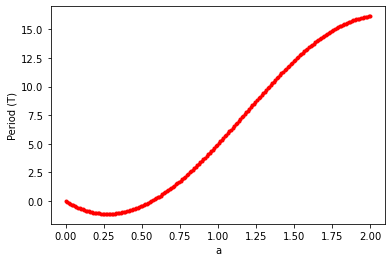

In [8]:
from gaussxw import gaussxw
import numpy as np
import matplotlib.pyplot as plt
V = lambda x: x**4
m = 1

N = 20

aArray = np.linspace(0,2,200)
for a in aArray:
    x,w = gaussxw(N)
    xp = 0.5*(a)*x+0.5*(a)
    wp = 0.5*(a)*w

    s = 0
    for k in range(N):
        s += wp[k]*f(xp[k])
    T = np.sqrt(8*m)*s
    plt.plot(a,T,'r.')
plt.xlabel('a')
plt.ylabel("Period (T)")
plt.show()

### Conclusion 
To answer part c, I think it diverges as it goes to zero because there is not much potential energy and when the potential goes to zero, T grows. 
# Exercise 5.14
### Introduction

$$ F_z = G\sigma z \int \int_{-L/2}^{L/2} {dx dy \over (x^2 + y^2 +z^2)^{3/2}} $$

Plot as a function of z from z = 0 to z = 10. use Gaussian quadrature for double integral.

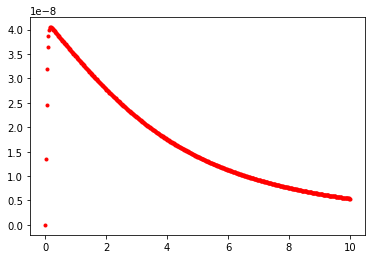

In [11]:
N = 100 # Number of points per axiz
L =10  #Length of one side of square
G = 6.674e-11 # Grav constant
m = 10e3  # 10 metric tons
A = L*L  # Area
σ = m/A  # Mass per area

f = lambda x,y,z : 1/(x**2 + y**2 +z**2)**(3/2)

zArray = np.linspace(0,10,500)
for z in zArray:
    N = 100

    a = L/2
    b = -L/2
    # x integral
    x,xw = gaussxw(N)
    xp = 0.5*(b-a)*x+0.5*(b+a)
    wpx = 0.5*(b-a)*xw
    # y integral
    y,yw = gaussxw(N)
    yp = 0.5*(b-a)*y+0.5*(b+a)
    wpy = 0.5*(b-a)*yw
    
    s = 0
    for i in range(N):
        for j in range(N):
            s += wpx[i]*wpy[j]*f(xp[i],yp[j],z)
    Fz = G*σ*z*s
    plt.plot(z,Fz,'r.')

### Conclusion
I did not understand the nested for loop for the double integral at first, but it makes sense now. As discussed in class, the reason it is weird close to zero is that the grid is not fine enough close to zero.